## CLASSIFYING MOVIE REVIEWS
two-class classification (binary classfication)
classify IMDB reviews as positive or negative

In [49]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [51]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    #create all-zero matrix of shape len(sequences) x dimension
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        #sets sepcific indices of results[i] to 1
        results[i, sequence] = 1
    return results

#vectorize training & test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [52]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [53]:
#vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [54]:
#creating neural network
from keras import models
from keras import layers

model = models.Sequential()

#two intermediate layers with 16 hidden units each
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))

#output layer
model.add(layers.Dense(1, activation='sigmoid'))
    #sigmoid squishes all values to be between 0-1

#loss function (binary crossentropy) viable when dealing with models that output probability
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

In [55]:
#creating validation set
#set apart 10,000 samples from original data model hasn't seen before
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [56]:
#training model
#20 epochs = 20 iterations over all samples in x_train, y_train
    #in mini bathes of 512 samples
#monitor loss and accurary on 10,000 samples at the same time
    #passing validation data as the validation_data argument
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 327us/step - loss: 0.5084 - acc: 0.7810 - val_loss: 0.3793 - val_acc: 0.8690
Epoch 2/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.3003 - acc: 0.9048 - val_loss: 0.3003 - val_acc: 0.8905
Epoch 3/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.2179 - acc: 0.9283 - val_loss: 0.3080 - val_acc: 0.8719
Epoch 4/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2838 - val_acc: 0.8835
Epoch 5/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.1426 - acc: 0.9543 - val_loss: 0.2849 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1149 - acc: 0.9652 - val_loss: 0.3144 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.0978 - acc: 0.9709 - val_loss: 0.3126 - 

In [57]:
#model.fit() returns History object
    #has a dictionary containing data about everything during training
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

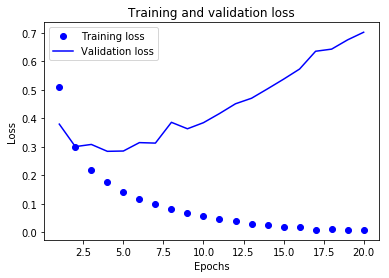

In [58]:
#Plotting training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

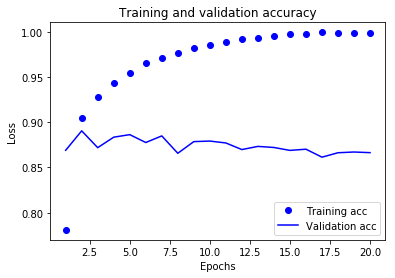

In [59]:
plt.clf() #clears figure

acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Results show training results better than test results from "overfitting"
4 epochs seem to be where validation accurary peaks and training loss is at its lowest

In [66]:
#train new network from scratch for 4 epochs
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 214us/step - loss: 0.4777 - acc: 0.8266
Epoch 2/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.2780 - acc: 0.9078
Epoch 3/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.2083 - acc: 0.9279
Epoch 4/4
25000/25000 [==============================] - 5s 184us/step


In [61]:
results

[0.3231467525100708, 0.87352]

Our simple approach gets an accuracy of 88% when predicting movie review positivity/negativity while state-of-the-art approaches get around 95%

In [62]:
#using it in a practical setting
model.predict(x_test)

array([[0.1402828 ],
       [0.9997029 ],
       [0.29563123],
       ...,
       [0.07235353],
       [0.04342763],
       [0.48158595]], dtype=float32)

each value is a probablity that it is positive